In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
path = "../Data science/Datasets/Social_Network_Ads.csv"

In [3]:
df = pd.read_csv(path)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Exploratory data a analysis:

In [4]:
df.shape

(400, 5)

In [5]:
#Missing values:
columns = df.columns.values.tolist()
for col in columns:
    nul = pd.isnull(df[col]).values.ravel().sum()
    print("For the column" + str(nul) + ": " + str(nul))

For the column0: 0
For the column0: 0
For the column0: 0
For the column0: 0
For the column0: 0


In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [8]:
cross_sex = pd.crosstab(df.Gender, df.Purchased)
cross_sex.columns = ['Not Purchased', 'Purchased']
cross_sex

,Not Purchased,Purchased
Gender,,
Female,127,77
Male,130,66


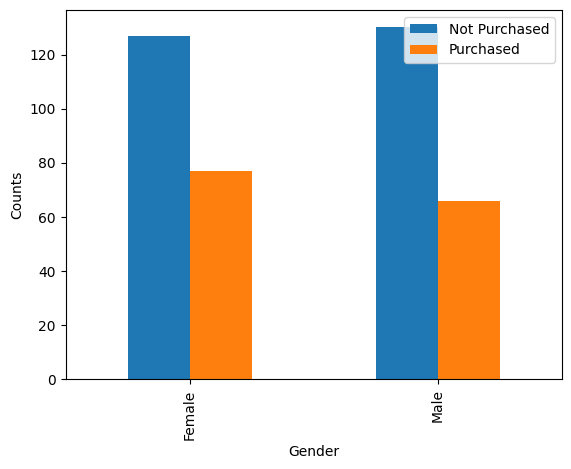

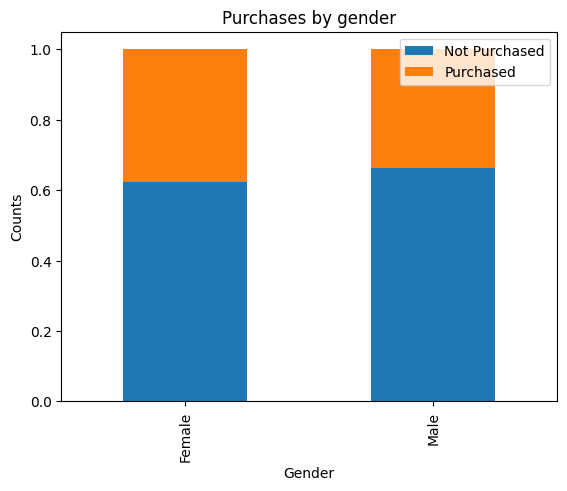

'\ncross_sex.sum(1) sums across the same row, changing columns, that is, 127 + 77 and 130 + 66.\n.div(cros_sex.sum(1).astype(float), axis=0) divides each row by the value obtained, where axis=0 indicates the operation is done across rows.\n'

In [9]:
cross_sex.plot(kind = "bar", stacked=False)
plt.ylabel("Counts")
plt.show()
cross_sex.div(cross_sex.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Purchases by gender")
plt.ylabel("Counts")
plt.show()
"""
cross_sex.sum(1) sums across the same row, changing columns, that is, 127 + 77 and 130 + 66.
.div(cros_sex.sum(1).astype(float), axis=0) divides each row by the value obtained, where axis=0 indicates the operation is done across rows.
"""

females buy more than males. Let's see the probabilities of success (buying) for each sex.

In [10]:
print("Probability of purchasing being male = " + str(66/(130+66)))
print("Probability of purchasing being female = " +  str(77/(127+77)))
print("\n")
print("Probability of NOT purchasing being male = " + str(1- (66/(130+66))))
print("Probability of NOT purchasing being female = " +  str(1- (77/(127+77))))

Probability of purchasing being male = 0.336734693877551
Probability of purchasing being female = 0.37745098039215685


Probability of NOT purchasing being male = 0.6632653061224489
Probability of NOT purchasing being female = 0.6225490196078431


In [11]:
#Let's group people in age ranges
Age = df["Age"].unique().tolist()
print(max(Age))
print(min(Age))
n = 6
print(f"Number of years for having {n} age groups: {(max(Age)-min(Age))/n}")

60
18
Number of years for having 6 age groups: 7.0


In [12]:
#first group: 18 <= Age <= 18+7 = 25
#second group: 25 <= Age <= 25+7 = 32
#third group: 32 <= Age <= 32+7 = 39
#third group: 39 <= Age <= 39+7 = 46
#fourth group: 46 <= Age <= 46+7 = 53
#fifth group: 53 <= Age <= 53+7 = 60

group_ages = [0, 18, 25, 32, 39, 46, 53, 60]

for i in range(len(group_ages)-1):
    df.loc[(group_ages[i] <= df["Age"]) & (df["Age"]>= group_ages[i+1]), "Age ranges"] = f"Between {group_ages[i]} and {group_ages[i+1]}"
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased,Age ranges
0,15624510,Male,19,19000,0,Between 0 and 18
1,15810944,Male,35,20000,0,Between 25 and 32
2,15668575,Female,26,43000,0,Between 18 and 25
3,15603246,Female,27,57000,0,Between 18 and 25
4,15804002,Male,19,76000,0,Between 0 and 18
5,15728773,Male,27,58000,0,Between 18 and 25
6,15598044,Female,27,84000,0,Between 18 and 25
7,15694829,Female,32,150000,1,Between 25 and 32
8,15600575,Male,25,33000,0,Between 18 and 25
9,15727311,Female,35,65000,0,Between 25 and 32


In [13]:
cross_age = pd.crosstab(df["Age ranges"], df["Purchased"])
cross_age.columns = ["Not Purchased", "Purchased"]
cross_age

,Not Purchased,Purchased
Age ranges,,
Between 0 and 18,43,0
Between 18 and 25,72,7
Between 25 and 32,78,23
Between 32 and 39,49,25
Between 39 and 46,13,50
Between 46 and 53,2,31
Between 53 and 60,0,7


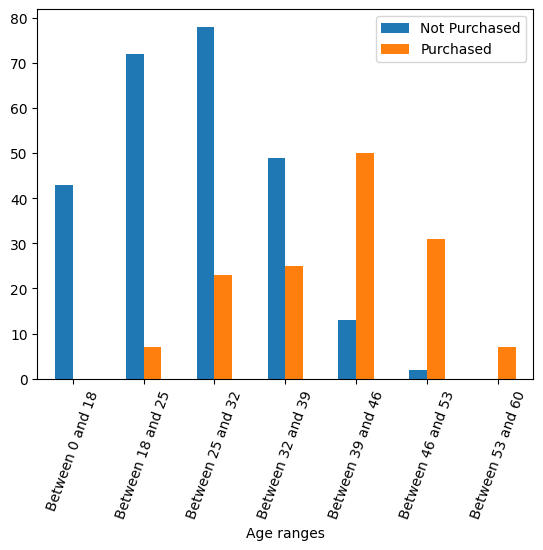

In [14]:
cross_age.plot(kind = "bar")
plt.xticks(rotation=70)
plt.show()

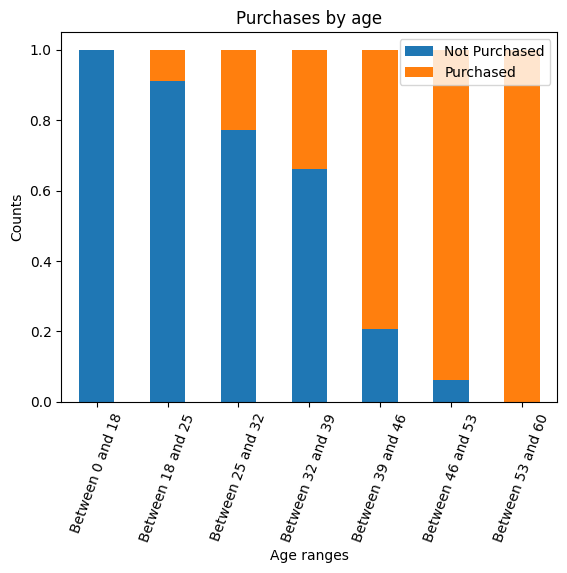

In [15]:
#Let's see the proportions:
cross_age.div(cross_age.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xticks(rotation=70)
plt.title("Purchases by age")
plt.ylabel("Counts")
plt.show()

It can be appreciated that ager people tend to buy the product more than younger people. In the group between 0 and 18, nobody is purchasing the product, whereas in the age group between 53 and 60 averybody is buying it. The ads in social networks are more powerful for old people.

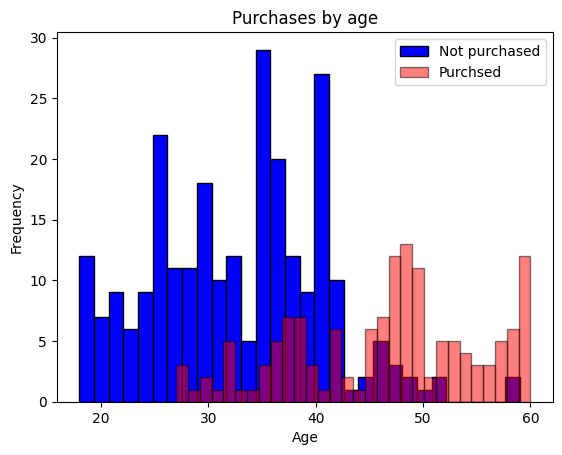

In [16]:
sub_df0 = df[df['Purchased']==0]
sub_df1 = df[df['Purchased']==1]
sub_df0['Age'].plot(kind='hist', bins=30, edgecolor='black', color = 'b', label = "Not purchased", alpha=1)
sub_df1['Age'].plot(kind='hist', bins=30, edgecolor='black', color = 'r', label = "Purchsed", alpha=0.5)
plt.xlabel("Age")
plt.title("Purchases by age")
plt.legend()
plt.show()

Let's study now the salary:

<Axes: ylabel='Frequency'>

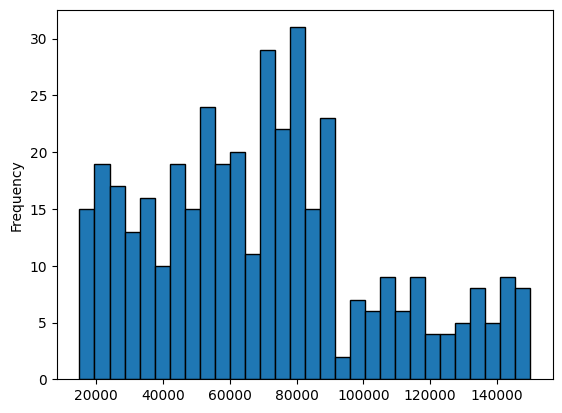

In [17]:
df['EstimatedSalary'].plot(kind = 'hist', bins = 30, edgecolor='black')

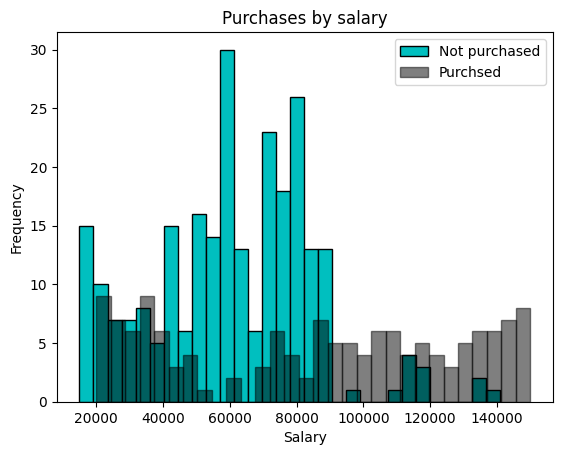

In [18]:
sub_df0 = df[df['Purchased']==0]
sub_df1 = df[df['Purchased']==1]
sub_df0['EstimatedSalary'].plot(kind='hist', bins=30, edgecolor='black', color = 'c', label = "Not purchased", alpha=1)
sub_df1['EstimatedSalary'].plot(kind='hist', bins=30, edgecolor='black', color = 'k', label = "Purchsed", alpha=0.5)
plt.xlabel("Salary")
plt.title("Purchases by salary")
plt.legend()
plt.show()

In [19]:
start = min(df["EstimatedSalary"])
end = max(df["EstimatedSalary"])
n_ranges = 10
step = (end  - start)/n_ranges
bins = np.arange(start, end + step, step)
bins = bins.tolist()
bins = [int(x) for x in bins]
print(bins)
labels = []
for i in range(len(bins)-1):
    labels.append(f"Range: {bins[i]}-{bins[i+1]}")
print(labels)

[15000, 28500, 42000, 55500, 69000, 82500, 96000, 109500, 123000, 136500, 150000]
['Range: 15000-28500', 'Range: 28500-42000', 'Range: 42000-55500', 'Range: 55500-69000', 'Range: 69000-82500', 'Range: 82500-96000', 'Range: 96000-109500', 'Range: 109500-123000', 'Range: 123000-136500', 'Range: 136500-150000']


In [20]:
df['SalaryRange'] = pd.cut(df['EstimatedSalary'], bins=bins, labels=labels, right=False)

In [21]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age ranges,SalaryRange
0,15624510,Male,19,19000,0,Between 0 and 18,Range: 15000-28500
1,15810944,Male,35,20000,0,Between 25 and 32,Range: 15000-28500
2,15668575,Female,26,43000,0,Between 18 and 25,Range: 42000-55500
3,15603246,Female,27,57000,0,Between 18 and 25,Range: 55500-69000
4,15804002,Male,19,76000,0,Between 0 and 18,Range: 69000-82500


In [28]:
cross_table_Salary = pd.crosstab(df["SalaryRange"], df["Purchased"])
cross_table_Salary

Purchased,0,1
SalaryRange,,
Range: 15000-28500,35,16
Range: 28500-42000,18,21
Range: 42000-55500,50,8
Range: 55500-69000,48,2
Range: 69000-82500,68,14
Range: 82500-96000,26,14
Range: 96000-109500,2,20
Range: 109500-123000,7,12
Range: 123000-136500,2,15


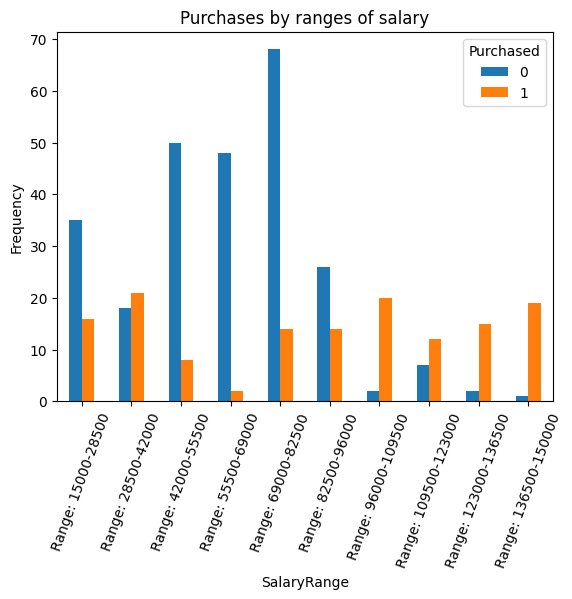

In [29]:
cross_table_Salary.plot(kind = "bar")
cross_table_Salary.columns = ["Not Purchased","Purchased"]
plt.xticks(rotation = 70)
plt.ylabel("Frequency")
plt.title("Purchases by ranges of salary")
plt.show()

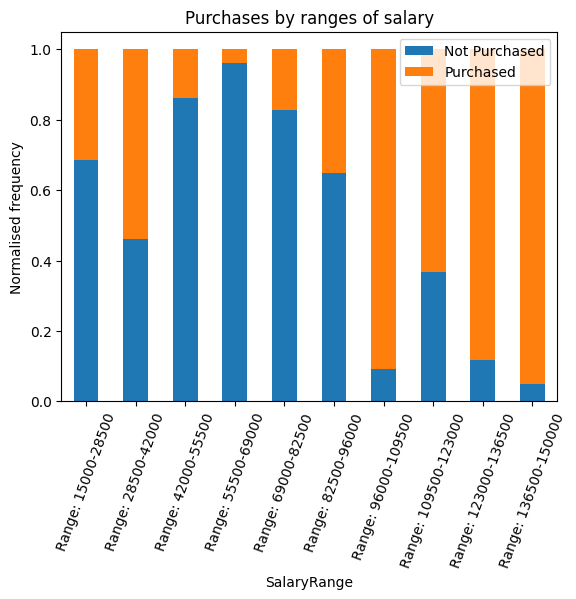

In [30]:
cross_table_Salary.div(cross_table_Salary.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xticks(rotation = 70)
plt.title("Purchases by ranges of salary")
plt.ylabel("Normalised frequency")
plt.show()

We have proved that for more salary that a person have, there are more chances that this person purchase the product

<Axes: xlabel='User ID', ylabel='Count'>

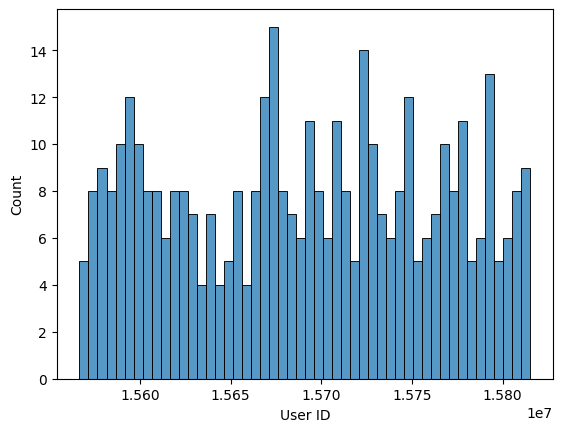

In [31]:
sns.histplot(df['User ID'], bins = 50)

Selection of features for the model:

In [32]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [33]:
columns

['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']

In [34]:
#Turning cathegorical values into dummies:
gender_dummy = pd.get_dummies(df['Gender'], prefix = 'Gender')
gender_dummy.head()

,Gender_Female,Gender_Male
0,False,True
1,False,True
2,True,False
3,True,False
4,False,True


In [35]:
df = df.drop(columns=['Gender'])

In [36]:
df = df.join(gender_dummy)

In [37]:
df['Gender_Female'] = df['Gender_Female'].replace({True: 1, False: 0})
df['Gender_Male'] = df['Gender_Male'].replace({True: 1, False: 0})
df.head()

C:\Users\victo\AppData\Local\Temp\ipykernel_7912\570884255.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender_Female'] = df['Gender_Female'].replace({True: 1, False: 0})
C:\Users\victo\AppData\Local\Temp\ipykernel_7912\570884255.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender_Male'] = df['Gender_Male'].replace({True: 1, False: 0})


,User ID,Age,EstimatedSalary,Purchased,Age ranges,SalaryRange,Gender_Female,Gender_Male
0,15624510,19,19000,0,Between 0 and 18,Range: 15000-28500,0,1
1,15810944,35,20000,0,Between 25 and 32,Range: 15000-28500,0,1
2,15668575,26,43000,0,Between 18 and 25,Range: 42000-55500,1,0
3,15603246,27,57000,0,Between 18 and 25,Range: 55500-69000,1,0
4,15804002,19,76000,0,Between 0 and 18,Range: 69000-82500,0,1


In [38]:
df = df.drop(columns = ['Age ranges', 'SalaryRange'])
df.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [39]:
Y = df['Purchased']
X = df[['User ID', 'Age', 'EstimatedSalary','Gender_Female', 'Gender_Male']]

In [40]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [41]:
lr = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)

In [42]:
rfe = RFE(lr, n_features_to_select=1)
rfe = rfe.fit(X, Y)

In [43]:
print(rfe.support_)

[False  True False False False]


In [44]:
print(rfe.ranking_)

[5 1 4 2 3]


In [45]:
z=zip(X, rfe.support_, rfe.ranking_)
list(z)

[('User ID', np.False_, np.int64(5)),
 ('Age', np.True_, np.int64(1)),
 ('EstimatedSalary', np.False_, np.int64(4)),
 ('Gender_Female', np.False_, np.int64(2)),
 ('Gender_Male', np.False_, np.int64(3))]

In [46]:
X = X.drop('User ID', axis = 1)
columns = X.columns.values.tolist()

In [47]:
import statsmodels.api as sm
logit_model = sm.Logit(Y, X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.344804
         Iterations 8


In [48]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Method:           MLE       
Dependent Variable:  Purchased        Pseudo R-squared: 0.471     
Date:                2024-09-17 22:19 AIC:              283.8432  
No. Observations:    400              BIC:              299.8091  
Df Model:            3                Log-Likelihood:   -137.92   
Df Residuals:        396              LL-Null:          -260.79   
Converged:           1.0000           LLR p-value:      5.4877e-53
No. Iterations:      8.0000           Scale:            1.0000    
------------------------------------------------------------------
                 Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
------------------------------------------------------------------
Age               0.2370   0.0264  8.9839 0.0000   0.1853   0.2887
EstimatedSalary   0.0000   0.0000  6.6585 0.0000   0.0000   0.0000
Gender_Female   -12.7836   1.3592 -9.4049 0.0000 -15.4477 -10.1196
Gender_Male     -12.4498   1.3092 -9.5097 0.0000 -15.0157  -9.8839
==================================================================

"""

Since all p-values are smaller than 0.005, which is below the 5% significance level, we can conclude that all coefficients are statistically significant. However, it can be appreciated that we have a 0 coeficient for the variable 'EstimatedSalary'. Lets create another model without this variable.

In [49]:
X2 = X.drop('EstimatedSalary', axis = 1)
columns2 = X2.columns.values.tolist()
logit_model2 = sm.Logit(Y, X2)
result2 = logit_model2.fit()
result2.summary2()

Optimization terminated successfully.
         Current function value: 0.420177
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: Purchased        Pseudo R-squared: 0.356     
Date:               2024-09-17 22:19 AIC:              342.1413  
No. Observations:   400              BIC:              354.1157  
Df Model:           2                Log-Likelihood:   -168.07   
Df Residuals:       397              LL-Null:          -260.79   
Converged:          1.0000           LLR p-value:      5.4203e-41
No. Iterations:     7.0000           Scale:            1.0000    
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Age               0.1895   0.0193   9.8421 0.0000  0.1518  0.2273
Gender_Female    -8.1154   0.8138  -9.9725 0.0000 -9.7103 -6.5204
Gender_Male      -8.0207   0.7870 -10.1914 0.0000 -9.5632 -6.4782
=================================================================

"""

The current model results in a worse fit compared to the previous one, as evidenced by the higher AIC and BIC values. Additionally, the Pseudo R-squared is lower. Therefore, we will select the initial model, as it provides a better fit.

Model implementation with scikit-learn:

In [50]:
from sklearn import linear_model

In [51]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y)
print(logit_model.score(X,Y))
print("By default it has been selected a threshold of 0,5")

0.8425
By default it has been selected a threshold of 0,5


C:\Users\victo\anaconda3\envs\Data_Science\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
print(f"Percentage of people that buy: {df['Purchased'].sum()*100/len(df)}")
print(f"Percentage of people that don't buy:{(1-df['Purchased'].sum()/len(df))*100}")

Percentage of people that buy: 35.75
Percentage of people that don't buy:64.25


Our model provides a better result compared to one that only computes the probabilities of buying without considering the other features in the dataset.

Let's create a new model and validate it to ensure its performance before finalizing it.

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0)

In [54]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

C:\Users\victo\anaconda3\envs\Data_Science\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
#Probabilities of belonging to class 0 (not purchase) or class 1 (purchase)
print(lm.classes_)
probs = lm.predict_proba(X_test)
probs

[0 1]


array([[0.84132266, 0.15867734],
       [0.8074475 , 0.1925525 ],
       [0.75533997, 0.24466003],
       [0.88600999, 0.11399001],
       [0.87438803, 0.12561197],
       [0.9796008 , 0.0203992 ],
       [0.97075696, 0.02924304],
       [0.3123794 , 0.6876206 ],
       [0.9873386 , 0.0126614 ],
       [0.47761653, 0.52238347],
       [0.93279429, 0.06720571],
       [0.95240576, 0.04759424],
       [0.78514521, 0.21485479],
       [0.59890218, 0.40109782],
       [0.96716324, 0.03283676],
       [0.67926912, 0.32073088],
       [0.67672712, 0.32327288],
       [0.97280319, 0.02719681],
       [0.03034224, 0.96965776],
       [0.92197488, 0.07802512],
       [0.88249784, 0.11750216],
       [0.07817328, 0.92182672],
       [0.7112304 , 0.2887696 ],
       [0.15980208, 0.84019792],
       [0.98927858, 0.01072142],
       [0.06126441, 0.93873559],
       [0.89897628, 0.10102372],
       [0.88229156, 0.11770844],
       [0.78559195, 0.21440805],
       [0.82280506, 0.17719494],
       [0.

In [56]:
from IPython.display import display, Math, Latex

In [57]:
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p >0.5\end{cases}'))

<IPython.core.display.Math object>

In [58]:
prediction = lm.predict(X_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [59]:
display(Math(r'\varepsilon\in (0,1), Y_p=\begin{cases}0& si\ p\leq \varepsilon\\1&si\ p >\varepsilon\end{cases}'))

<IPython.core.display.Math object>

In [60]:
#Chnging threshold:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.2
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df

,0,prediction
0,0.158677,0
1,0.192553,0
2,0.244660,1
3,0.113990,0
4,0.125612,0
...,...,...
115,0.728021,1
116,0.858190,1
117,0.164045,0
118,0.674450,1


Let's choose the best threshold for our model

In [61]:
# Create thresholds
thresholds = np.arange(0, 1, 0.01)
sensitivities = []
especifities_1 = []

# Assuming prob_df is your dataframe with probabilities and Y_test is your true labels
for t in thresholds:
    # Create prediction column based on threshold
    prob_df["prediction"] = np.where(prob_df[0] >= t, 1, 0)
    prob_df["actual"] = list(Y_test)
    
    # Compute confusion matrix
    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)

    # Ensure that confusion_matrix contains both classes (0 and 1) for rows and columns
    TN = confusion_matrix.loc[0, 0] if (0 in confusion_matrix.index and 0 in confusion_matrix.columns) else 0
    TP = confusion_matrix.loc[1, 1] if (1 in confusion_matrix.index and 1 in confusion_matrix.columns) else 0
    FP = confusion_matrix.loc[1, 0] if (1 in confusion_matrix.index and 0 in confusion_matrix.columns) else 0
    FN = confusion_matrix.loc[0, 1] if (0 in confusion_matrix.index and 1 in confusion_matrix.columns) else 0
    
    # Calculate sensitivity (recall)
    sens = TP / (TP + FN) if (TP + FN) > 0 else 0
    sensitivities.append(sens)

    # Calculate 1-specificity (false positive rate)
    espc_1 = 1 - (TN / (TN + FP)) if (TN + FP) > 0 else 0
    especifities_1.append(espc_1)

Text(0.5, 1.0, 'Roc curve')

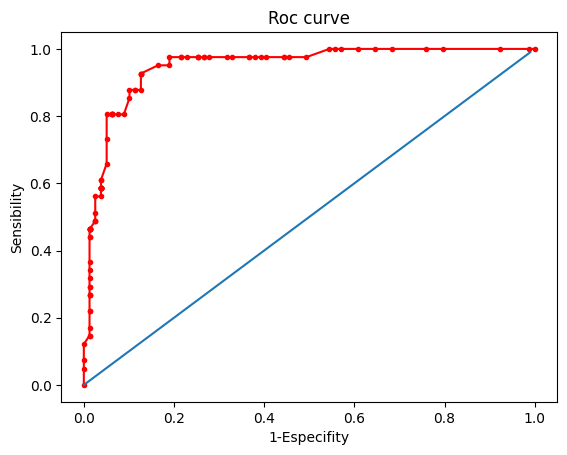

In [62]:
plt.plot(especifities_1, sensitivities, marker = ".", linestyle="-", color="r")
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especifity")
plt.ylabel("Sensibility")
plt.title("Roc curve")

In [63]:
#Let's compute the best thresholds:
from math import sqrt
distances = []
for i in range(len(sensitivities)):
    sensi = sensitivities[i]
    especi_1 = especifities_1[i]
    distances.append(sqrt((1-sensi)**(2)+especi_1**(2)))
index = distances.index(min(distances))
best_threshold = thresholds[index]
print(f"The best threshold that can be chosen is: {best_threshold}")

The best threshold that can be chosen is: 0.34


In [64]:
from sklearn.metrics import accuracy_score
probs = lm.predict_proba(X_test)[:, 1]
threshold = 0.34
predictions = (probs >= threshold).astype(int)
precision_personalised = accuracy_score(Y_test, predictions)
print(f"Using the a threshold = {threshold} our model has a precision of {precision_personalised}") 

Using the a threshold = 0.34 our model has a precision of 0.8916666666666667


We have encreased the effectiveness of our model in compare to use a threshold of 0,5 that the precission was 0.8425

In [70]:
print(lm.intercept_)
print(columns)
print(lm.coef_)

[-6.10862845]
['Age', 'EstimatedSalary', 'Gender_Female', 'Gender_Male']
[[ 1.68939186e-01  2.53243172e-05 -3.01078563e+00 -2.83086517e+00]]


In [75]:
display(Math(r'Final\;model:\frac{1}{1 + e^{-(-6.1086 + 1.6893e-01 Age + 2.5324e-05 EstimatedSalary - 3.0108 Gender_Female - 2.8308 Gender_Male)}}'))
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.34\\1&si\ p >0.34\end{cases}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>